NAME:Komal Chitnis

Roll No:26

Moodle ID:20102068

BE COMPS DIV A

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/ML DATASET/daily_weather.csv')

In [ ]:
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [ ]:
data.shape

(1095, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  1095 non-null   int64  
 1   air_pressure_9am        1092 non-null   float64
 2   air_temp_9am            1090 non-null   float64
 3   avg_wind_direction_9am  1091 non-null   float64
 4   avg_wind_speed_9am      1092 non-null   float64
 5   max_wind_direction_9am  1092 non-null   float64
 6   max_wind_speed_9am      1091 non-null   float64
 7   rain_accumulation_9am   1089 non-null   float64
 8   rain_duration_9am       1092 non-null   float64
 9   relative_humidity_9am   1095 non-null   float64
 10  relative_humidity_3pm   1095 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB


In [ ]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [ ]:
data[data.isnull().any(axis=1)].head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.0,0.0,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.0,0.0,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.0,0.0,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.0,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.0,0.0,52.580000,54.030000


In [ ]:
del data['number']

In [ ]:
data=data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1064 non-null   float64
 1   air_temp_9am            1064 non-null   float64
 2   avg_wind_direction_9am  1064 non-null   float64
 3   avg_wind_speed_9am      1064 non-null   float64
 4   max_wind_direction_9am  1064 non-null   float64
 5   max_wind_speed_9am      1064 non-null   float64
 6   rain_accumulation_9am   1064 non-null   float64
 7   rain_duration_9am       1064 non-null   float64
 8   relative_humidity_9am   1064 non-null   float64
 9   relative_humidity_3pm   1064 non-null   float64
dtypes: float64(10)
memory usage: 91.4 KB


In [ ]:
data.shape

(1064, 10)

In [ ]:
clean_data=data.copy()

In [ ]:
clean_data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [ ]:
clean_data['high_humidity_label']=(clean_data['relative_humidity_3pm']>28)*1
clean_data['high_humidity_label'].head()

0    1
1    0
2    0
3    0
4    1
Name: high_humidity_label, dtype: int64

In [ ]:
y=clean_data[['high_humidity_label']].copy()
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


In [ ]:
clean_data.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm', 'high_humidity_label'],
      dtype='object')

In [ ]:
morning_features=['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',]

In [ ]:
x=clean_data[morning_features].copy()
x.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am'],
      dtype='object')

In [ ]:
y.columns

Index(['high_humidity_label'], dtype='object')

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=324)

In [ ]:
humidity_classifier=DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
humidity_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [ ]:
y_predicted=humidity_classifier.predict(x_test)

In [ ]:
accuracy_score(y_test,y_predicted)

0.8892045454545454

In [ ]:
confusion_matrix(y_test,y_predicted)

array([[166,  14],
       [ 25, 147]])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML DATASET/MNIST_data.csv')

In [ ]:
data.shape

(42000, 785)

In [ ]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
x = data.iloc[:,1:].values
x.shape

(42000, 784)

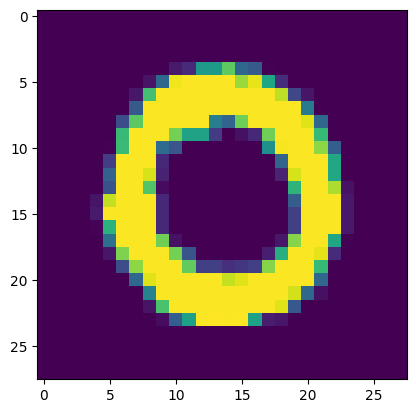

In [ ]:
plt.imshow(x[1].reshape(28,28))

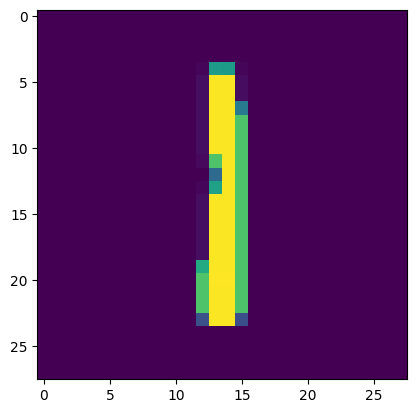

In [ ]:
plt.imshow(x[2].reshape(28,28))

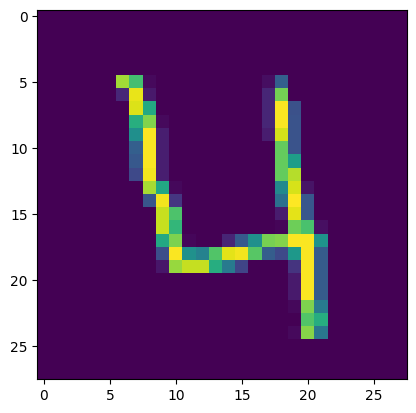

In [ ]:
plt.imshow(x[3].reshape(28,28))

In [ ]:
y = data.iloc[:,0].values
y.shape

(42000,)

In [ ]:
y

array([1, 0, 1, ..., 7, 6, 9])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

In [ ]:
x_train.shape

(33600, 784)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier = DecisionTreeClassifier()

In [ ]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_test[100]

5

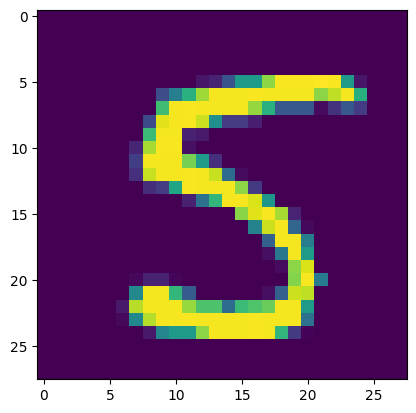

In [ ]:
plt.imshow(x_test[100].reshape(28,28))

In [ ]:
classifier.predict(x_test[100].reshape(1,784))

array([5])

In [ ]:
y_test[99]

3

array([3])

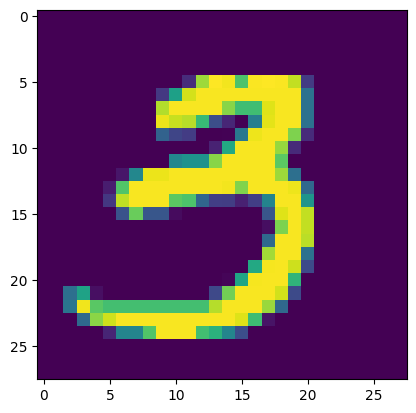

In [ ]:
plt.imshow(x_test[99].reshape(28,28))
classifier.predict(x_test[99].reshape(1,784))

In [ ]:
y_test[101]

7

array([3])

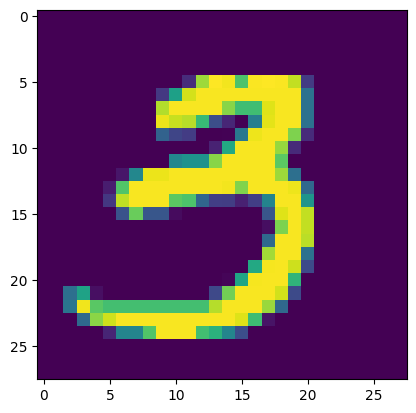

In [ ]:
plt.imshow(x_test[99].reshape(28,28))
classifier.predict(x_test[99].reshape(1,784))

In [ ]:
y_predicted=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test,y_predicted)

0.8495238095238096

In [ ]:
confusion_matrix(y_test,y_predicted)

array([[749,   1,   8,   8,   5,   9,   6,   2,   5,   8],
       [  0, 901,  16,   7,   5,  11,   4,   9,  14,   1],
       [ 12,  14, 670,  30,  14,   8,  12,  31,  29,   9],
       [ 12,  14,  26, 713,  10,  41,   5,  16,  26,  22],
       [  5,  12,  20,   4, 684,   9,  11,   9,  19,  35],
       [ 17,   7,   8,  39,   6, 611,  25,   8,  29,  17],
       [ 16,   1,  17,   6,   8,  29, 703,   3,  16,   4],
       [  2,   5,  23,  10,  11,   4,   4, 766,  13,  17],
       [ 18,  17,  26,  28,  17,  44,  19,  13, 644,   9],
       [  7,   9,   9,  13,  43,  25,   2,  28,  18, 695]])